# UK Traffic Accidents ML Model Interpretability

<h1>Tabla de Contenidos<span class="tocSkip"></span></h1>
<br>
<div class="toc">
   <ul class="toc-item">
      <li>
         <span><a href="#Problem-Definition" data-toc-modified-id="Problem-Definition-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem Overview</a></span>
       </li>
       <li>
         <span><a href="#Dataset-Analysis" data-toc-modified-id="Dataset-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dataset</a></span>
         <ul class="toc-item">
            <li><span><a href="#Importing-Python-libraries" data-toc-modified-id="Importing-Python-libraries-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Importing Python libraries</a></span></li>
            <li><span><a href="#Importing-the-data" data-toc-modified-id="Importing-the-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Importing the data</a></span></li>
            <li>
               <span><a href="#Data-Description-and-Exploratory-Visualisations" data-toc-modified-id="Data-Description-and-Exploratory-Visualisations-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Dataset Analysis</a></span>
            </li>
             </li>
            <li>
<span><a href="#Building-Machine-Learning-Models" data-toc-modified-id="Building-Machine-Learning-Models-4"><span class="toc-item-num">3&nbsp;&nbsp;</span>Building Machine Learning Models</a></span>
            </li>
             <li>
                <span><a href="#Building-Machine-Learning-Models" data-toc-modified-id="Building-Machine-Learning-Models-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Interpreting the Machine Learning Models</a></span>
         <ul class="toc-item">
            <li><span><a href="#Baseline-Algorithms" data-toc-modified-id="Baseline-Algorithms-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li>
              <li>
               <span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Gradient Boosted Tree</a></span>
            </li>
             </ul>
             </li>
             </li>
      <li>
         <span><a href="#Concluding-Remarks" data-toc-modified-id="Concluding-Remarks-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Concluding Remarks</a></span>
       </li>
</div>

## 1. Problem Overview

Partimos de 3 .csv que guardan los datos de los accidentes, victimas y vehiculos de UK del año 2020. Fueron descargados desde la pagina oficial del gobierno de Gran Bretaña https://data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data. De esos 3 .csv iniciales, los unificamos en uno solo mediante el identificador del accidente y después (ya solo con un .csv) filtramos y obtenemos los datos que nos interesan para luego implementar los modelos. Una vez con los modelos implementados, realizamos la interpretación mediante las librerías correspondientes.

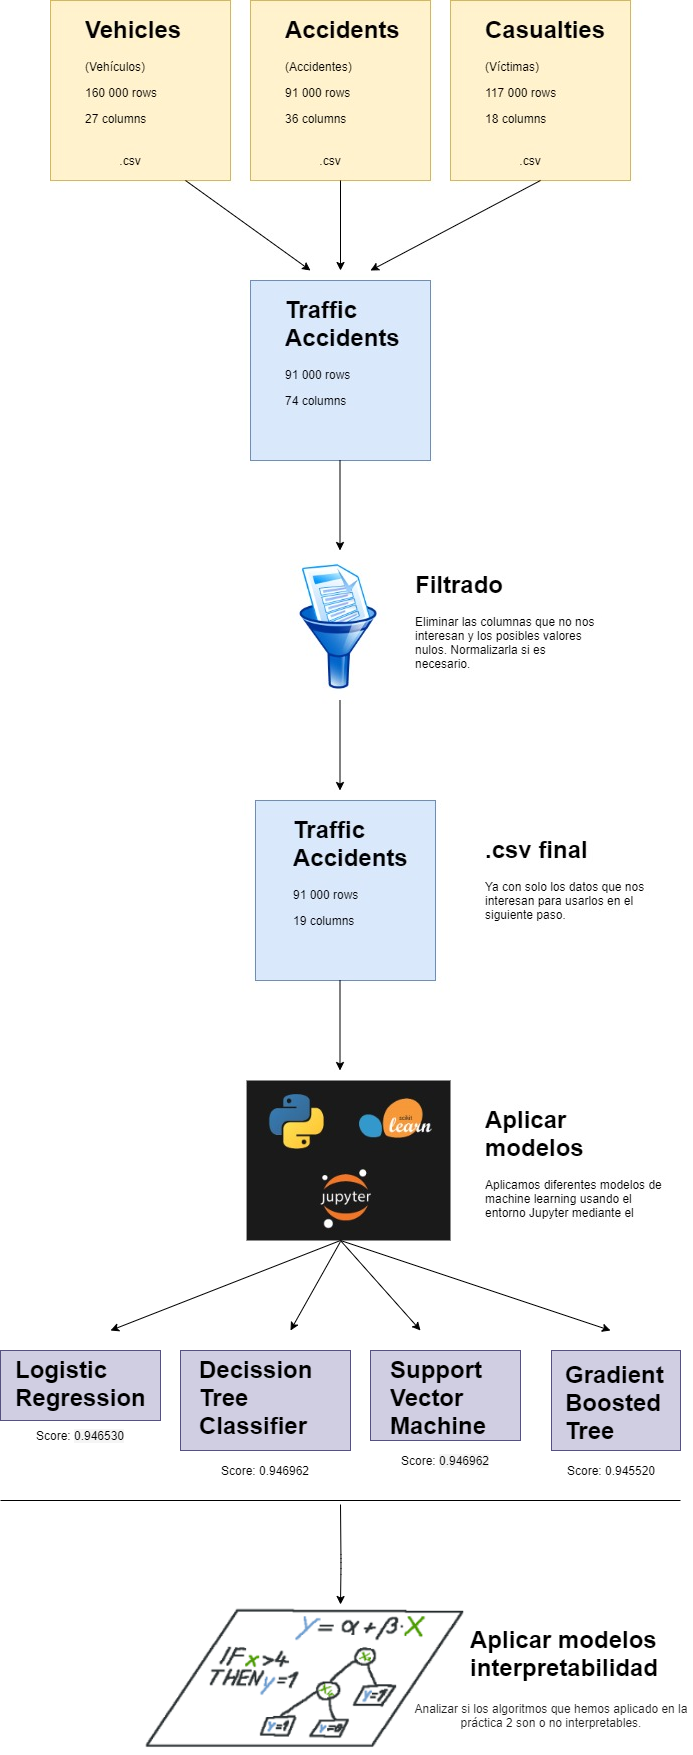

In [22]:
from IPython import display
display.Image('data/Overview_practica3.png')

## 2. Dataset

En este caso de estudio, se ha obtenido un conjunto de datos de Road Safety Data de [Find Open Data](https://data.gov.uk/)  <br>

Como se indica en el [Sitio web del Dataset](https://data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data) 
<em>Estos archivos proporcionan datos detallados de seguridad vial sobre las circunstancias de los accidentes de tráfico con lesiones personales en Gran Bretaña desde 1979 (aunque nosotros usaremos únicamente los más actuales disponibles, los de 2020) los tipos de vehículos implicados y las víctimas resultantes. Las estadísticas se refieren únicamente a los accidentes con lesiones personales en la vía pública que se notifican a la policía, y que posteriormente se registran, utilizando el formulario de notificación de accidentes STATS19.<br>Todas las variables de datos están codificadas en lugar de contener cadenas textuales. Las tablas de búsqueda están disponibles en la sección "Recursos adicionales" hacia la parte inferior de la tabla.También incluye: Los resultados de los datos de las pruebas de alcoholemia de los dispositivos digitales de pruebas de alcoholemia introducidos recientemente, proporcionados por las autoridades policiales de Inglaterra y Gales Los resultados de los niveles de alcohol en sangre (miligramos / 100 mililitros de sangre) proporcionados por el cotejo de los datos de los médicos forenses (proporcionados por los médicos forenses de Inglaterra y Gales y por los Procuradores Fiscales de Escocia) con los datos de víctimas mortales de los datos policiales STATS19 de accidentes de tráfico en Gran Bretaña. Los casos en los que los niveles de alcohol en sangre de una víctima mortal son "desconocidos" son consecuencia de una coincidencia infructuosa entre los dos conjuntos de datos.</em>


### 2.1. Importing Python Libraries

In [9]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
%matplotlib inline
from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeRegressor                                             
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text                
from sklearn.metrics import accuracy_score, classification_report , plot_confusion_matrix

from sklearn import svm
from mlxtend.plotting import plot_decision_regions

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler

from xgboost import XGBClassifier
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt

import lime
import lime.lime_tabular

import eli5
from eli5.sklearn import PermutationImportance

#from skater.core.explanations import Interpretation
#from skater.model import InMemoryModel

### 2.2. Importing the data

Importamos el conjuntos de datos, contamos con 3 archivos CSV que previamente unificaremos en uno solo con las variables que nos interesen para proceder con el estudio.

In [10]:
#Read csv file
df_vehicles = pd.read_csv('data/dft-road-casualty-statistics-vehicle-2020.csv')
df_accidents = pd.read_csv('data/dft-road-casualty-statistics-accident-2020.csv')
df_casualties = pd.read_csv('data/dft-road-casualty-statistics-casualty-2020.csv')
#Shape of CSV
print("El primer CSV contiene: {} (filas x columnas)".format(df_vehicles.shape))
print("El segundo CSV contiene: {} (filas x columnas)".format(df_accidents.shape))
print("El tercer CSV contiene: {} (filas x columnas)".format(df_casualties.shape))

C:\Users\RICARDO\anaconda3\envs\myfirstCopyBaseConda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


El primer CSV contiene: (167375, 27) (filas x columnas)
El segundo CSV contiene: (91199, 36) (filas x columnas)
El tercer CSV contiene: (115584, 18) (filas x columnas)


Unificamos los 3 csv anteriores usando merge function con how='inner'. Dado el propio funcionamiento de la funcion lo deberemos hacer en dos partes (df_vehicles + df_accidents) + df_casualties

In [11]:
#Unificamos df_accidents con df_vehicles
df_traffic_accidents_v1 = pd.merge(df_accidents, df_vehicles, how='inner')

#Unificamos df_traffic_accidents_v1 con df_casualties
df_traffic_accidents = pd.merge(df_traffic_accidents_v1, df_casualties, how='inner')
print("El archivo CSV final contiene: {} (filas x columnas)".format(df_traffic_accidents.shape))

El archivo CSV final contiene: (92450, 74) (filas x columnas)


In [12]:
df_traffic_accidents.dropna(['date', 'time', 'accident_index', 'day_of_week', 'generic_make_model', 'car_passenger','did_police_officer_attend_scene_of_accident','sex_of_casualty','age_of_vehicle','age_of_driver','generic_make_model'] == -1)

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,2020010278554,2020,010278554,531639.0,168889.0,-0.108858,51.403761,1,2,2,...,5,2,0,0,0,0,0,3,-1,-1
1,2020010278556,2020,010278556,528687.0,184702.0,-0.145519,51.546549,1,2,2,...,4,2,0,0,0,0,0,3,1,1
2,2020010278558,2020,010278558,534296.0,179438.0,-0.066682,51.497938,1,3,2,...,7,3,0,0,0,0,0,3,1,3
3,2020010278559,2020,010278559,530354.0,172580.0,-0.125965,51.437228,1,3,2,...,7,3,0,0,0,0,0,3,1,6
4,2020010278561,2020,010278561,534946.0,184874.0,-0.055243,51.546633,1,2,1,...,7,2,1,1,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92445,2020990963785,2020,990963785,376184.0,791681.0,-2.393835,57.015628,99,2,1,...,8,2,0,0,0,0,0,5,1,10
92446,2020990963795,2020,990963795,328793.0,671649.0,-3.141316,55.932604,99,3,2,...,7,3,0,0,0,0,0,1,1,8
92447,2020990963798,2020,990963798,296508.0,637621.0,-3.644928,55.621124,99,3,1,...,7,3,9,8,0,0,0,0,3,3
92448,2020990963826,2020,990963826,202304.0,763674.0,-5.232567,56.722717,99,2,3,...,8,2,0,0,0,0,0,5,1,10


In [13]:
df_traffic_accidents = df_traffic_accidents.reindex(columns = ['accident_severity', 'number_of_vehicles', 'number_of_casualties', 'day_of_week', 'did_police_officer_attend_scene_of_accident', 'sex_of_driver', 'age_of_driver', 'age_of_vehicle', 'sex_of_casualty', 'age_of_casualty', 'car_passenger', 'casualty_severity'])

In [14]:
df_traffic_accidents_lg = df_traffic_accidents.drop(['number_of_casualties','day_of_week', 'did_police_officer_attend_scene_of_accident',
                                                    'sex_of_driver','age_of_vehicle','age_of_driver', 'car_passenger'], axis=1)

In [15]:
df_traffic_accidents_lg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92450 entries, 0 to 92449
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   accident_severity   92450 non-null  int64
 1   number_of_vehicles  92450 non-null  int64
 2   sex_of_casualty     92450 non-null  int64
 3   age_of_casualty     92450 non-null  int64
 4   casualty_severity   92450 non-null  int64
dtypes: int64(5)
memory usage: 4.2 MB


### 2.3. Dataset Analysis

#### 2.3.1 Analisis Univariante

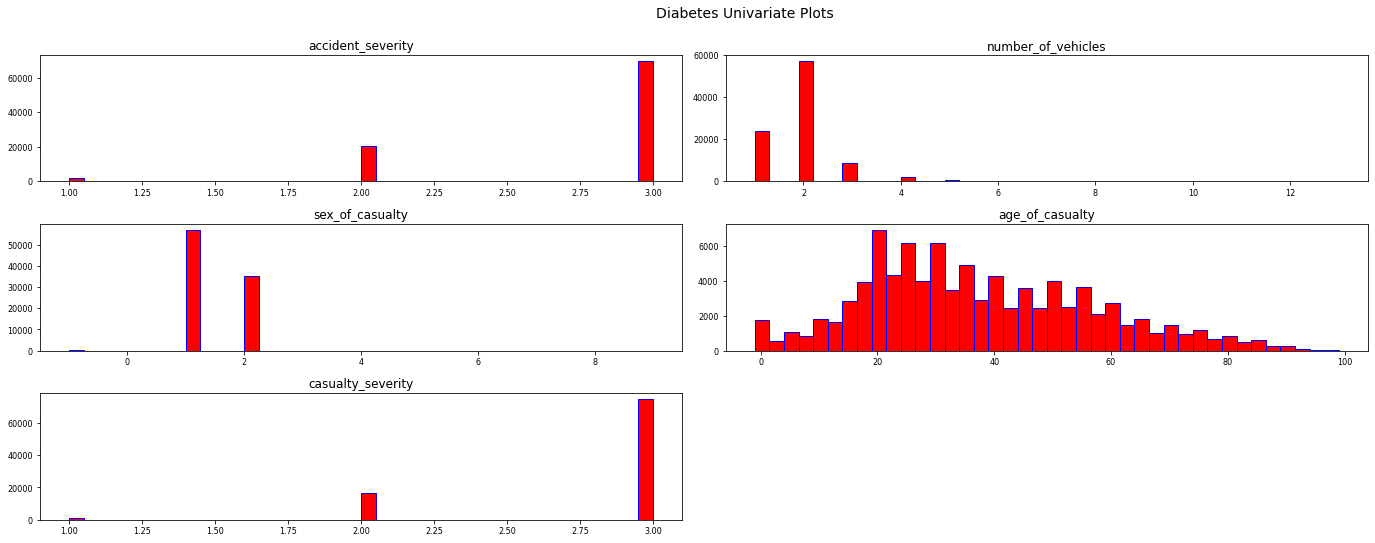

In [16]:
features_list = list(df_traffic_accidents_lg.columns)
df_traffic_accidents_lg[features_list].hist(bins=40, edgecolor='b', linewidth=1.0,
                          xlabelsize=8, ylabelsize=8, grid=False, 
                          figsize=(16,6), color='red')    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.suptitle('Diabetes Univariate Plots', x=0.65, y=1.25, fontsize=14);  

No detectamos ningún valor fuera de lo normal en nuestro análisis individual de cada uno de nuestros parámetro, así que continuamos con la interpretabilidad

### 2.3.2 Análisis Multivariante

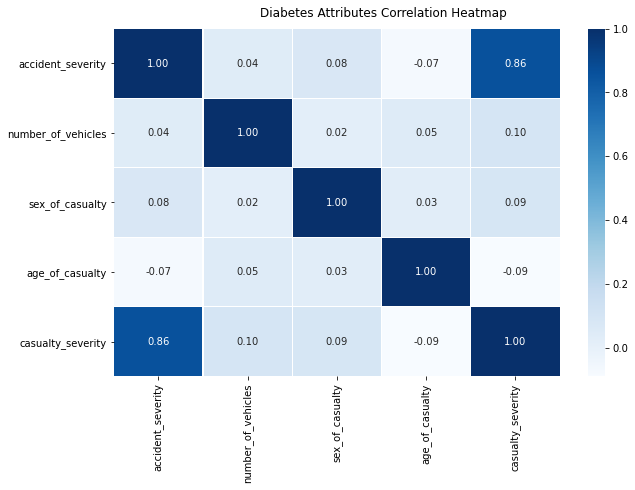

In [17]:
# Visualizamos las correlaciones
f, ax = plt.subplots(figsize=(10, 6))
corr = df_traffic_accidents_lg.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="Blues",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t = f.suptitle('Diabetes Attributes Correlation Heatmap', fontsize=12)

A partir de la matriz de correlación podemos ver que tenemos una gran realción ente las variables casualty_severity y accident_severity pues tenemos un valor relevante >0,5.
Es razonable que la severidad del accidente tenga amplia relación con la severidad del accidente de la víctima.

## 3. Building ML Models

## Logistic Regression

In [39]:
df_traffic_accidents.dropna(['date', 'time', 'accident_index', 'day_of_week', 'generic_make_model', 'car_passenger','did_police_officer_attend_scene_of_accident','sex_of_casualty','age_of_vehicle','age_of_driver','generic_make_model'] == -1)


,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,did_police_officer_attend_scene_of_accident,sex_of_driver,age_of_driver,age_of_vehicle,sex_of_casualty,age_of_casualty,car_passenger,casualty_severity
0,2,2,1,2,1,1,23,4,1,23,0,2
1,2,2,1,4,3,1,17,4,1,17,0,2
2,3,2,1,2,1,1,45,0,1,45,0,3
3,3,2,1,2,1,1,45,7,1,45,0,3
4,2,1,1,2,1,1,52,2,1,42,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
92445,2,1,1,7,2,1,51,20,1,51,0,2
92446,3,2,1,4,1,1,36,-1,1,36,0,3
92447,3,1,1,7,1,1,83,6,2,40,0,3
92448,2,3,1,7,2,1,52,21,1,52,0,2


In [42]:
df_traffic_accidents = df_traffic_accidents.reindex(columns = ['accident_severity', 'number_of_vehicles', 'number_of_casualties', 'day_of_week', 'did_police_officer_attend_scene_of_accident', 'sex_of_driver', 'age_of_driver', 'age_of_vehicle', 'sex_of_casualty', 'age_of_casualty', 'car_passenger', 'casualty_severity'])


In [43]:
df_traffic_accidents_lg = df_traffic_accidents.drop(['number_of_casualties','day_of_week', 'did_police_officer_attend_scene_of_accident',
                                                    'sex_of_driver','age_of_vehicle','age_of_driver', 'car_passenger'], axis=1)

Hacemos las particiones testeo y entrenamiento y aplicamos el modelo. Con la funcion train_test_split, divide el conjunto de datos, en subconjunto de entrenamiento y validacion, y subconjunto de testeo

In [44]:
X_train, X_test, y_train, y_test = train_test_split(df_traffic_accidents_lg.drop('casualty_severity', axis=1), df_traffic_accidents_lg['casualty_severity'])


In [46]:
lr = LogisticRegression(solver = 'lbfgs', max_iter = 1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [49]:
lr.score(X_train, y_train)

0.9462768795880987

## Gradient Boosted Tree

Primero, ajustamos el modelo de datos y creamos un nuevo dataframe con el vamos a trabajar.

In [88]:
df_traffic_accidents_gbt = df_traffic_accidents.drop(['number_of_casualties','day_of_week', 'did_police_officer_attend_scene_of_accident',
                                                    'sex_of_driver','age_of_vehicle','age_of_driver', 'car_passenger'], axis=1)
df_traffic_accidents_gbt.head()

,accident_severity,number_of_vehicles,sex_of_casualty,age_of_casualty,casualty_severity
0,2,2,1,23,2
1,2,2,1,17,2
2,3,2,1,45,3
3,3,2,1,45,3
4,2,1,1,42,2


In [89]:
X = df_traffic_accidents_gbt.drop('casualty_severity', axis = 1)                                                   
y = df_traffic_accidents_gbt.casualty_severity

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 1) 

Ahora ya podemos dividir los datos en los conjuntos de entrenamiento y prueba, además, establecemos el porcentaje para determinar la cantidad de datos en cada conjunto.

XGBoost es una librería de gradient boosting distribuida y optimizada, diseñada para ser altamente eficiente, flexible y portable. Implementa algoritmos de aprendizaje automático bajo el marco del Gradient Boosting. XGBoost proporciona un boosting de árbol paralelo (también conocido como GBDT, GBM) que resuelve muchos problemas de ciencia de datos de forma rápida y precisa.

In [91]:
#Ajustamos y entrenamos nuestro clasificador
xgb = XGBClassifier(objective='binary:logistic', random_state=33, n_jobs=-1)
xgb.fit(X_train, y_train, eval_metric = 'logloss')

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=33, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

Con la función score podemos verificar la puntuación que se logra en el conjunto de validación.

In [93]:
score = xgb_clf.score(X_val, y_val)
print(score)

0.9533865567859903


El resultado de este algoritmo es el mejor que se ha obtenido frente al resto de algoritmos empleados.

## 4. Interpreting the Machine Learning Models

### 4.1. Logistic Regression

La regresion logistica es un modelo parametrico dado que ofrece un primer nivel de interpretacion a través de sus coeficientes. Primero usamos la libreria LIME para deducir que variables influyen más para clasificar la gravedad de la victima en las 3 opciones posibles (1, 2, 3). Veremos cuando influye más cada una y cuál es para la regresion logistica la más importante. 

In [ ]:
import lime
import lime.lime_tabular

Definimos las clases en las que la regresion logistica clasifica y predice para nuestra varible.

In [ ]:
classes = ['1','2','3']

Creamos el explainer, concretamente un Lime Tabular Explainer, donde le pasamos el X_train usado para entrenar el modelo (tanto los valores como las columnas) y luego las classes en las que clasifica. 

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(lr_X_train.values, feature_names=lr_X_train.columns, 
                                                   class_names=classes, kernel_width=5)

Recordamos como es el df usado, con el cual la regresion logistica realizara las predicciones:

In [ ]:
df_traffic_accidents_lg.head(1)

In [ ]:
lr_X_test

Para construir el modelo con LIME necesitamos una funcion de prediccion. El predict_proba nos dará la probabilidad predecida, despues lo convertimos a float y los asignamos a la funcion.

In [ ]:
predict_fn_nn= lambda x: lr.predict_proba(x).astype(float)

In [ ]:
predict_fn_nn

Para obtener el resultado le pasamos la instancia elegida y la funcion de prediccion hecha antes. Con el num_features le decimos que use 4 variables para realizar el analisis. Y despues mostramos los resultados. En este caso hacemos la prueba con la fila 62236 de nuestro conjunto de datos de test.

In [ ]:
lr_X_test.loc[5787]

In [ ]:
instancia_n = lr_X_test.loc[[5787]].values[0]
exp = explainer.explain_instance(instancia_n, predict_fn_nn, num_features=4)
exp.show_in_notebook(show_all=False)
exp.as_list()

Observamos que el resultado de la prediccion fue 2 (accidente severo) con 0.53 y que para el modelo el numero de vehiculos fue la variable mas importante para obtener la predicción, por delante de otras variables a priori vitales como la edad o el sexo.

Cuando realizamos el modelo de regresion logistica, pusimos varios casos hipotéticos y despues intentamos deducir que variables eran mas importantes, ahora podremos obtener la propia explicacion de las predicciones generadas y comparar los resultados. 

### Interpretabilidad Caso 1

En los dos primeros casos vamos a ver la importancia que tiene number_of_vehicles. Para accidentes  de 1 o 2 lo más probable es obtener un 2 como máximo mientras que para accidentes de 3 es poco habitual obtener valores como 1 o 2. En el primer caso, para una mujer de 65 con un accidente fuerte y 1 coche involucrado moriria en el momento mientras que para un hombre de 16 años en un accidente grave con 6 coches involucrados sería hospitalizado. 

In [ ]:
lr.predict(np.array([[1,1,2,65]]))[0]

In [ ]:
instancia_1 = np.array([[1,1,2,65]])[0]
exp = explainer.explain_instance(instancia_1, predict_fn_nn, num_features=4, top_labels=1)
exp.show_in_notebook(show_table = True, show_all=False)

In [ ]:
lr.predict(np.array([[1,6,2,65]]))[0]

In [ ]:
instancia_2 = np.array([[1,6,2,65]])[0]
exp = explainer.explain_instance(instancia_2, predict_fn_nn, num_features=4, top_labels=1)
exp.show_in_notebook(show_table = True, show_all=False)

#### Conclusion Caso 1

Vemos que para ambos casos el numero de vehiculos ocupa una posicion muy alta para definir la prediccion del modelo. El numero de vehiculos afecta notablemente en la severidad de la victima dado que como podemos ver, para un accidente con 1 vehiculo involucrado habría 0.77 posibilidades de morir mientras que con 6 coches habria 0.27 (Los dos casos para un accidente mortal, de una mujer de 65 años). En cambio, pensamos en un primer momento que la severidad del accidente era muy importante para clasificar dado que si un accidente fue muy grave no es muy habitual que la victima salga ilesa. No obstante, la variable accident_severity no resulta ser importante dado que tanto en este como en los siguientes ejemplos ocupa la ultima posicion. 

***Acertamos en:*** Relevancia de la variable number_of_vehicles. 

### Interpretabilidad Caso 2

En estos dos siguientes casos nos centraremos en las variables edad y sexo de la victima dado que van a resultar ser de vital importancia. En ambos casos pondremos la situación de un accidente "grave" con 3 coches involucrados y mientras que en uno se trata de un mujer de 65 y en otro de un hombre de 35. En el primer caso sería un accidente mortal mientras que el segundo sería hospitalizado. 

In [ ]:
lr.predict(np.array([[1,3,1,35]]))[0]

In [ ]:
instancia_3 = np.array([[1,3,1,35]])[0]
exp = explainer.explain_instance(instancia_3, predict_fn_nn, num_features=4, top_labels=1)
exp.show_in_notebook(show_table = True, show_all=False)

In [ ]:
lr.predict(np.array([[1,3,2,65]]))[0]

In [ ]:
instancia_4 = np.array([[1,3,2,65]])[0]
exp = explainer.explain_instance(instancia_4, predict_fn_nn, num_features=4, top_labels=1)
exp.show_in_notebook(show_table = True, show_all=False)

#### Conclusion Caso 2

Para este caso pensamos que la edad y el sexo eran importantes para la predicción, y así fue. No obstante, el numero de vehiculos sigue siendo más esencial que el sexo dado que es mucho más decisivo en el accidente. La edad de la victima se muestra como vital dado que afecta en la posibilidad de haber obtenido en los casos anteriores un accidente de grado 2 en vez de el mortal. Por ejemplo, con una edad de 35 la probabilidad de haber tenido un accidente menos severo es del 0.45 mientras que con casi el dosble de edad se reduce hasta el 0.42.

***Acertamos en:*** Relevancia de la variable age_of_casualty. 

### Interpretabilidad Caso 3

Y por ultimo veremos para unos datos de accidente identicos en cuanto a la victima como influye la severidad del accidente.

In [ ]:
lr.predict(np.array([[3,6,2,65]]))[0]

In [ ]:
instancia_5 = np.array([[3,6,2,65]])[0]
exp = explainer.explain_instance(instancia_5, predict_fn_nn, num_features=4, top_labels=1)
exp.show_in_notebook(show_table = True, show_all=False)

In [ ]:
lr.predict(np.array([[1,6,2,65]]))[0]

In [ ]:
instancia_5 = np.array([[1,6,2,65]])[0]
exp = explainer.explain_instance(instancia_5, predict_fn_nn, num_features=4, top_labels=1)
exp.show_in_notebook(show_table = True, show_all=False)

#### Conclusion Caso 3

Para ambos casos se trata de un accidente con 6 vehiculos involucrados, de una mujer con 65 años. La variable accident_severity sigue siendo poco importante para la predicción pero en el caso en el que el resto de variables hipoteticas sean iguales permite clasificar de diferente manera. En el caso de un accidente de grado 3, habría un 100% de resultar ileso mientras que en un accidente de 1, no habría ninguna. Estaría repartido con un 1/3 entre 1 y 2. 

***Acertamos en:*** Relevancia de la variable accident_severity pero unicamente en el caso en el que todas las variables sean iguales ella sera la definidora final de la prediccion. 

### 4.2 Gradient Boosted Tree

A pesar de haber estudiado la interpretabilidad de la Regresión Logística, el algoritmo de Machine Learning que mejor resultado nos ofrece es el Gradient Boosted Tree.

### FAIRML

In [97]:
from fairml import audit_model
from fairml import plot_dependencies

In [98]:
xgb_fair = XGBClassifier(objective='binary:logistic', random_state=33, n_jobs=-1)

xgb_fair.fit(X_train.values, y_train, eval_metric = 'logloss')

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=33, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [99]:
# call audit model
feat_importances, _ = audit_model(xgb_fair.predict, X_train, distance_metric='accuracy', direct_input_pertubation_strategy='constant-zero',
                                 number_of_runs=50, include_interactions=True)

# print feature importance
print(feat_importances)

Feature: accident_severity,	 Importance: 0.10518426948929924
Feature: number_of_vehicles,	 Importance: 0.10697674418604651
Feature: sex_of_casualty,	 Importance: 0.11311133431198331
Feature: age_of_casualty,	 Importance: 0.26426639882562003


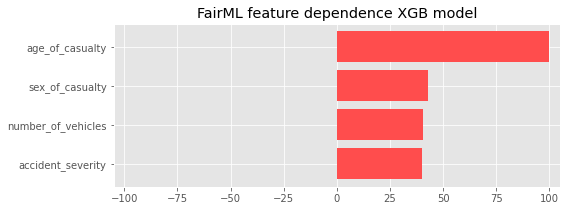

In [102]:
fig = plot_dependencies(
    feat_importances.median(),
    reverse_values=False,
    title="FairML feature dependence XGB model",
    fig_size=(8,3)
    )

### ELI5

In [104]:
import eli5
from eli5.sklearn import PermutationImportance

In [105]:
eli5.show_weights(xgb.get_booster())

Weight,Feature
0.9889,accident_severity
0.0052,number_of_vehicles
0.0037,sex_of_casualty
0.0022,age_of_casualty


In [106]:
# necesitamos reentrenar un nuevo modelo con arrays
# ya que eli5 tiene un error con Dataframes y XGBoost
# cf. https://github.com/TeamHG-Memex/eli5/pull/261
xgb_array = XGBClassifier(objective='binary:logistic', random_state=33, n_jobs=-1)
xgb_array.fit(X_train, y_train, eval_metric = 'logloss')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=33, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [109]:
feat_permut = PermutationImportance(xgb_array, random_state=33).fit(X_train, y_train)


In [120]:
feature_list = ['accident_severity', 'number_of_vehicles', 'sex_of_casualty', 'age_of_casualty']
eli5.show_weights(feat_permut, feature_names = feature_list)

Weight,Feature
0.2959 ± 0.0022,accident_severity
0.0066 ± 0.0006,age_of_casualty
0.0063 ± 0.0004,number_of_vehicles
0.0021 ± 0.0003,sex_of_casualty


In [121]:
from pdpbox import pdp, get_dataset, info_plots

In [122]:
def plot_pdp(model, df, feature, cluster_flag=False, nb_clusters=None, lines_flag=False):
    
    # Crear los datos que vamos a trazar
    pdp_goals = pdp.pdp_isolate(model=model, dataset=df, model_features=df.columns.tolist(), feature=feature)

    # plot it
    pdp.pdp_plot(pdp_goals, feature, cluster=cluster_flag, n_cluster_centers=nb_clusters, plot_lines=lines_flag)
    plt.show()

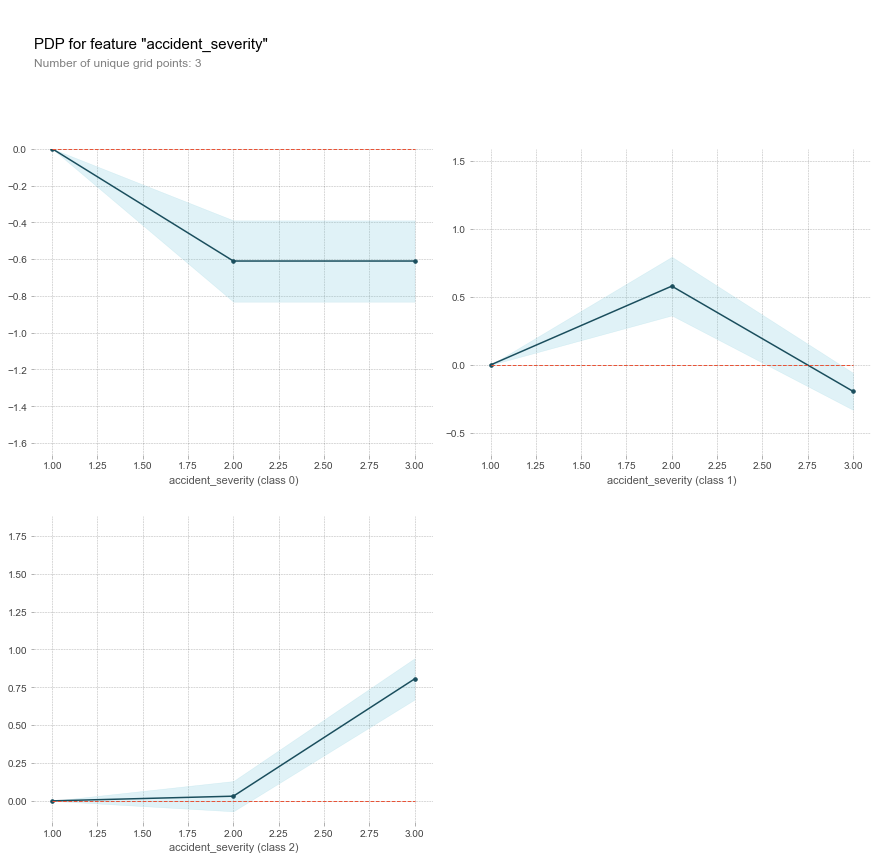

In [124]:
plot_pdp(xgb, X_train, 'accident_severity')

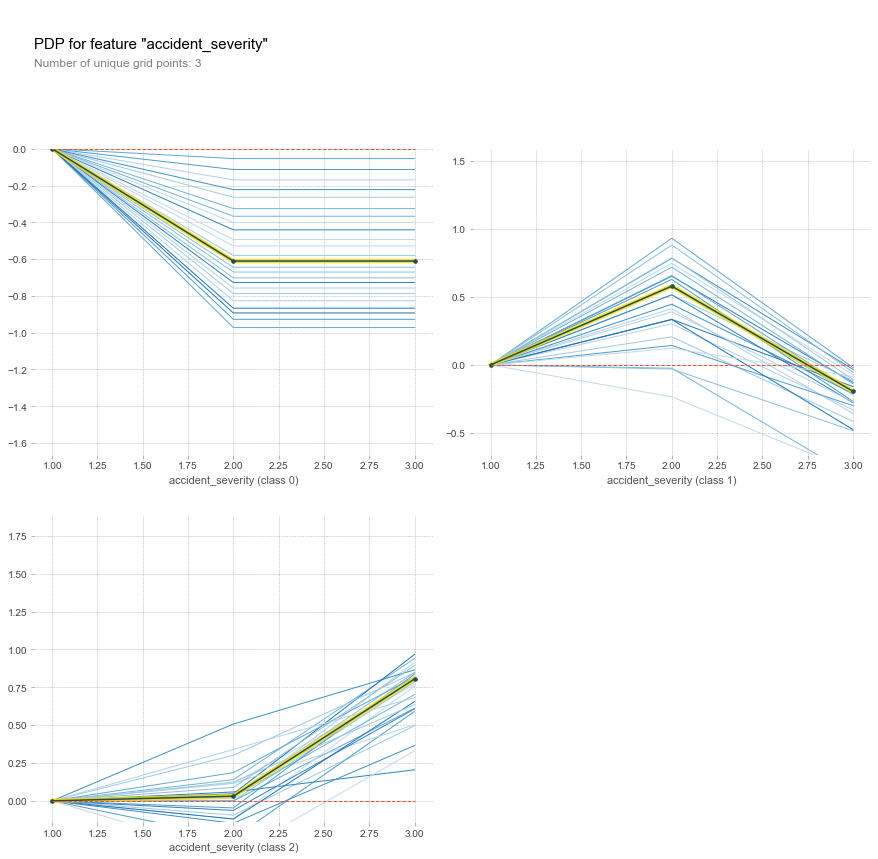

In [130]:
# para el gráfico de ICE debemos especificar el número de clusters de similitud que queremos, 24
plot_pdp(xgb, X_train, 'accident_severity', cluster_flag=True, nb_clusters=24, lines_flag=True)

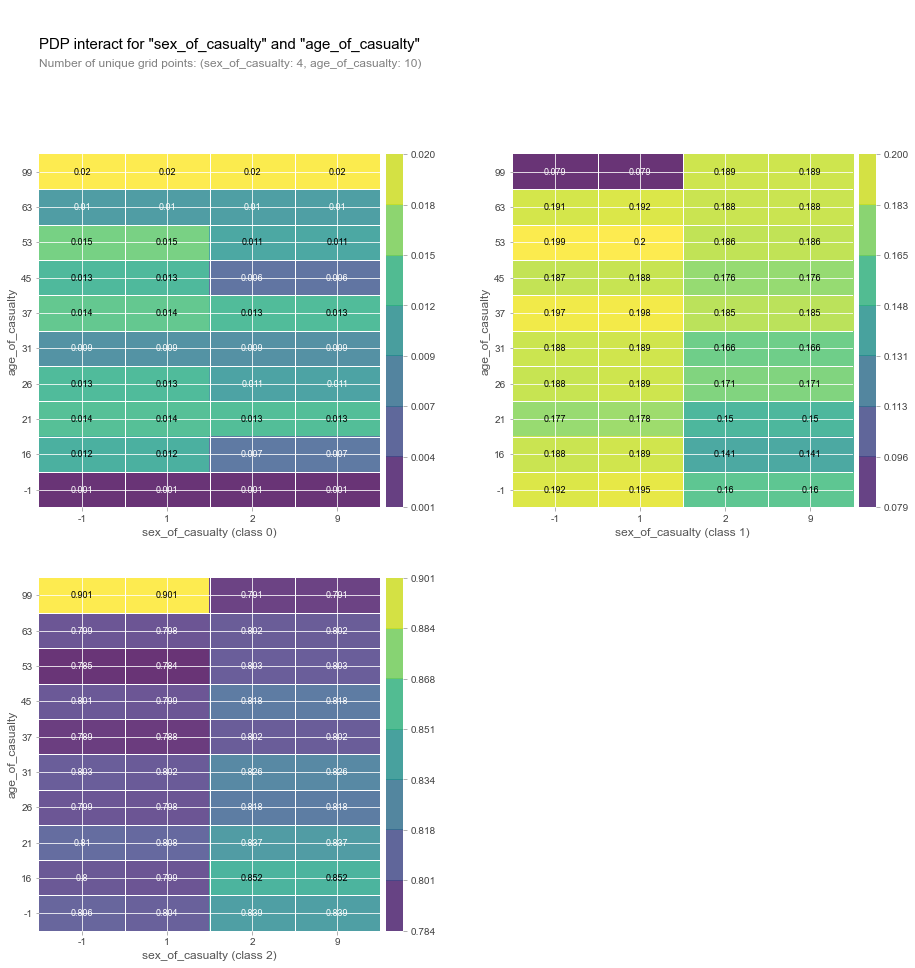

In [129]:
features_to_plot = ['sex_of_casualty', 'age_of_casualty']
inter1  =  pdp.pdp_interact(model=xgb, dataset=X_train, model_features=feature_list, features=features_to_plot)
pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='grid')

plt.show()

## 5. Concluding remarks